In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [18]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [19]:
import os 
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

# 数据加载，构造图
G = nx.read_gml(data_path + 'LPA/football.gml')
print(G)
print(type(G))

Graph with 115 nodes and 613 edges
<class 'networkx.classes.graph.Graph'>


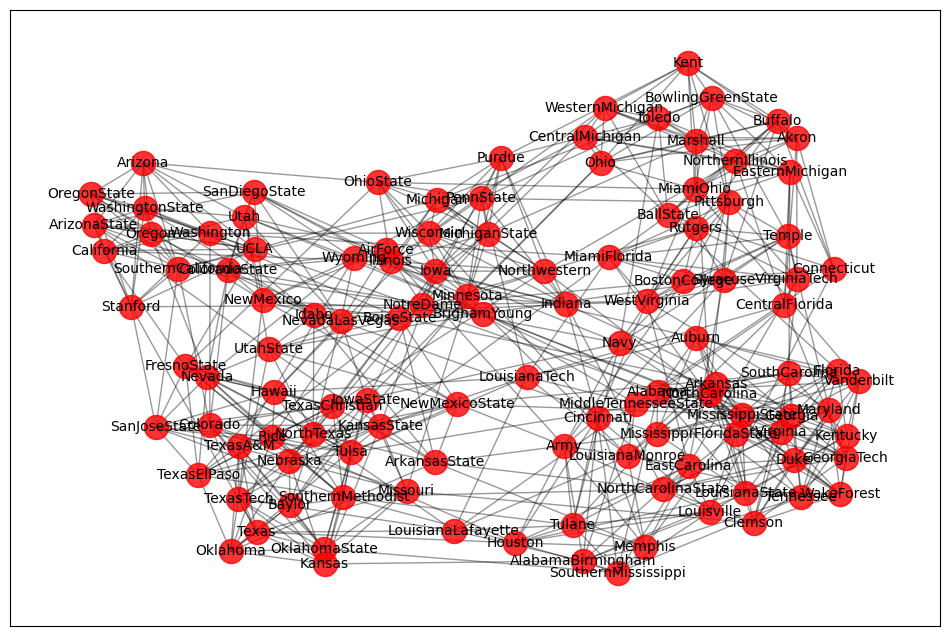

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [20]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])

In [21]:
# 构建 GCN，计算 A_hat 和 D_hat 矩阵
# 按照字母顺序排序
order = sorted(list(G.nodes()))
print(order)

# 邻接矩阵
A = nx.to_numpy_array(G, nodelist = order)
print(A)

['AirForce', 'Akron', 'Alabama', 'AlabamaBirmingham', 'Arizona', 'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn', 'BallState', 'Baylor', 'BoiseState', 'BostonCollege', 'BowlingGreenState', 'BrighamYoung', 'Buffalo', 'California', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Colorado', 'ColoradoState', 'Connecticut', 'Duke', 'EastCarolina', 'EasternMichigan', 'Florida', 'FloridaState', 'FresnoState', 'Georgia', 'GeorgiaTech', 'Hawaii', 'Houston', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Kent', 'Kentucky', 'LouisianaLafayette', 'LouisianaMonroe', 'LouisianaState', 'LouisianaTech', 'Louisville', 'Marshall', 'Maryland', 'Memphis', 'MiamiFlorida', 'MiamiOhio', 'Michigan', 'MichiganState', 'MiddleTennesseeState', 'Minnesota', 'Mississippi', 'MississippiState', 'Missouri', 'Navy', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthCarolina', 'NorthCarolinaState', 'NorthTexas', 'NorthernIllinois', '

In [22]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print(I)
A_hat = A + I
print(A_hat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [23]:
# D_hat 为 A_hat 的度矩阵
D_hat = np.sum(A_hat, axis=0)
print('D_hat: \n', D_hat)

D_hat: 
 [11. 12. 12. 11. 12. 12. 11. 11. 12. 12. 11. 11. 10. 12. 12. 13. 12. 12.
  9. 12. 12. 11. 12. 11.  8. 12. 12. 12. 12. 13. 12. 11. 12. 12. 12. 10.
 12. 12. 13. 12. 11. 13. 11. 11.  9.  9. 11. 11. 11. 11. 12. 12. 11. 12.
 12. 12. 10. 12. 12. 12. 11. 12. 12. 13. 13. 12. 12. 12. 12. 11. 11. 12.
 12. 11. 12. 12. 11. 12. 11. 13. 12. 12. 12. 11. 12. 12. 12. 13. 13. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 10. 12. 13. 12. 12. 10. 12. 11. 12.
 11. 12. 12. 12. 11. 13. 12.]


In [24]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat: \n', D_hat)

D_hat: 
 [[11.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]]


In [25]:
# 初始化权重，normal 正太分布 loc 均值，scale 标准差
# 第一层神经元， 4 个维度
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))

# 第二层神经元，4 => 2
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1: \n', W_1)
print('W_2: \n', W_2)

W_1: 
 [[ 4.80478747e-02  1.00331653e+00  9.69343392e-01  3.27895844e-01]
 [-1.30187358e+00 -2.30903024e-01  6.94703846e-01  9.26361747e-01]
 [ 7.84659657e-01  9.04441018e-02  9.88397719e-01 -1.78909298e+00]
 [ 9.79769441e-02  1.50625657e+00 -5.30299849e-01 -4.77974834e-01]
 [-8.71356957e-01 -1.86005567e-01 -1.12346774e+00  5.20977493e-03]
 [ 7.34760590e-01 -4.80930930e-01  1.40990479e-01 -7.80708654e-01]
 [-1.71568226e-02  4.45176952e-01  1.92466139e+00  1.33957526e+00]
 [ 4.80406674e-01 -8.80694598e-01 -4.81096818e-02 -6.18732830e-02]
 [ 3.15842899e-01 -8.63681638e-01  2.54103987e-01  5.85694205e-01]
 [-6.79168406e-01 -7.72158165e-01 -2.01849893e+00 -1.37393378e+00]
 [-1.69593282e-03  2.30001972e-01 -2.84143856e-02 -7.40173402e-01]
 [ 3.92319993e-02 -6.27558271e-01 -1.00321103e+00  1.06232708e-01]
 [ 2.80611082e-01 -1.98903721e-02  2.60345555e+00  7.51406606e-01]
 [ 1.34996186e+00 -6.87966747e-02  2.42017362e-01  1.79965921e-01]
 [-2.39919087e-01 -3.43514631e-01  5.51092022e-01  1.16

In [26]:
# 当 x<0 时，结果 = 0，x >= 0 时，结果 = x
def relu(x):
  return (abs(x)+x) / 2

In [27]:
# 叠加 GCN 层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一

def gcn_layer(A_hat, D_hat, X, W):
  return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output: \n', output)

output: 
 [[0.46288687 0.        ]
 [0.35883    0.        ]
 [0.24076423 0.        ]
 [0.28381014 0.424618  ]
 [0.40073334 0.        ]
 [0.45639097 0.        ]
 [0.32600762 0.        ]
 [0.58575108 0.27211051]
 [0.17644157 0.29653856]
 [0.13843638 0.        ]
 [0.30062971 0.        ]
 [0.22289437 0.94448263]
 [0.82932484 0.00149108]
 [0.2786521  0.08787104]
 [0.29047633 0.08613835]
 [0.37606653 0.06332682]
 [0.25151541 0.        ]
 [0.35603435 0.        ]
 [0.30661124 0.06518667]
 [0.29034215 0.        ]
 [0.19515547 0.31896277]
 [0.38819559 0.53302404]
 [0.10660978 0.74328054]
 [0.43932716 0.09857847]
 [0.430246   0.        ]
 [0.36865607 0.43062576]
 [0.20483453 0.37880487]
 [0.33995943 0.        ]
 [0.18754475 0.        ]
 [0.37306708 0.44341086]
 [0.33109531 0.41897412]
 [0.2212222  0.        ]
 [0.44093954 0.33736196]
 [0.26828771 0.46992132]
 [0.17858122 0.49798237]
 [0.68757692 0.11463463]
 [0.33836259 0.06944645]
 [0.19516552 0.17439307]
 [0.15698197 0.21935186]
 [0.11427426 0.

In [28]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
  feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations: \n', feature_representations)

feature_representations: 
 {'BrighamYoung': array([0.46288687, 0.        ]), 'FloridaState': array([0.35883, 0.     ]), 'Iowa': array([0.24076423, 0.        ]), 'KansasState': array([0.28381014, 0.424618  ]), 'NewMexico': array([0.40073334, 0.        ]), 'TexasTech': array([0.45639097, 0.        ]), 'PennState': array([0.32600762, 0.        ]), 'SouthernCalifornia': array([0.58575108, 0.27211051]), 'ArizonaState': array([0.17644157, 0.29653856]), 'SanDiegoState': array([0.13843638, 0.        ]), 'Baylor': array([0.30062971, 0.        ]), 'NorthTexas': array([0.22289437, 0.94448263]), 'NorthernIllinois': array([0.82932484, 0.00149108]), 'Northwestern': array([0.2786521 , 0.08787104]), 'WesternMichigan': array([0.29047633, 0.08613835]), 'Wisconsin': array([0.37606653, 0.06332682]), 'Wyoming': array([0.25151541, 0.        ]), 'Auburn': array([0.35603435, 0.        ]), 'Akron': array([0.30661124, 0.06518667]), 'VirginiaTech': array([0.29034215, 0.        ]), 'Alabama': array([0.19515547, 0

In [29]:
# 不同节点 value, 绘制不同的颜色
def getValue(value):
  colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
  return colorList[int(value)]

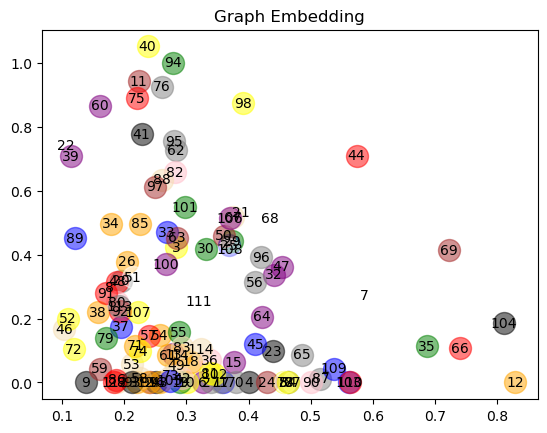

In [30]:
# 绘制 output，节点 GCN Embedding 可视化
def plot_node(output, title):
  for i in range(len(nodes)):
    node_name = nodes[i]
    value = G.nodes[node_name]['value']
    plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i), color=getValue(value), alpha=0.5, s=250)
    plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
  plt.title(title)
  plt.show()

plot_node(output, 'Graph Embedding')

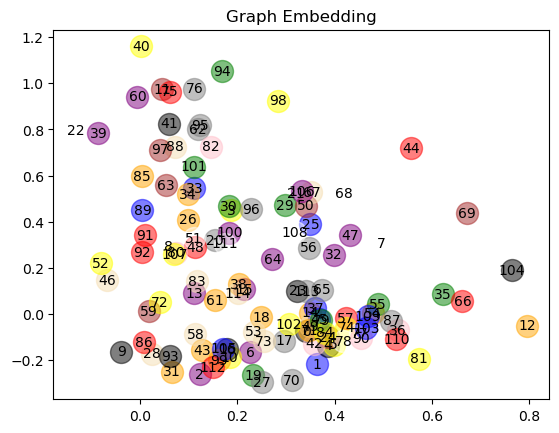

In [31]:
# 尝试去掉激活函数 relu, 重新运行一遍，效果可能会更好
def gcn_layer2(A_hat, D_hat, X, W):
  return D_hat**-1 * A_hat * X * W

H_3 = gcn_layer2(A_hat, D_hat, I, W_1)
H_4 = gcn_layer2(A_hat, D_hat, H_3, W_2)
output2 = H_4
plot_node(output2, 'Graph Embedding')